In [1]:
#Load the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('cmw-1.4')

#Importing libraries to pre-process data
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from bs4 import BeautifulSoup
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

#Import package for building conventional supervised learning models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

#Import methods for building neural networks
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping

#Import 'KerasClassifier' from 'keras' to connect neural networks with GridSearch and sklearn
from keras.wrappers.scikit_learn import KerasClassifier

import os
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rashi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rashi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading cmw-1.4: Package 'cmw-1.4' not found in
[nltk_data]     index


In [2]:
#Review the training data set
reviews_df = pd.read_csv(r'D:\Data Analyst Boot Camp\Assignment Data\Assignment 7\train_file_kaggle.csv')
print(reviews_df.shape)
reviews_df.head(10)

(7463, 2)


,Reviews,Sentiments
0,"bittersweet comedy/drama full of life , hand g...",pos
1,you have to pay attention to follow all the st...,pos
2,"overall , interesting as a documentary -- but ...",pos
3,precocious smarter-than-thou wayward teen stru...,pos
4,nicolas philibert observes life inside a one-r...,pos
5,such an incomprehensible mess that it feels le...,neg
6,i won't argue with anyone who calls 'slackers'...,pos
7,here's a self-congratulatory 3d imax rah-rah .,neg
8,"rumor , a muddled drama about coming to terms ...",neg
9,the story is so light and sugary that were it ...,neg


In [3]:
#Tokenization of text
tokenizer = ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [4]:
#Set stopwords to english
stop = set(stopwords.words('english'))
print(stop)

#Removed the stopwords
def remove_stopwords(text, is_lower_case = False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ''.join(filtered_tokens)
    return filtered_text

#Apply function on review column

reviews_df['Reviews']=reviews_df['Reviews'].apply(remove_stopwords)


{"hasn't", 'against', 'further', 'by', 'off', 'll', 'of', 'weren', "isn't", 'yours', 'doesn', 'ourselves', 'before', 'should', 'will', 'who', 'mightn', 'myself', 'an', 'there', 'both', 'very', "wouldn't", 'all', 'from', "she's", 'needn', 'is', 'hers', 'me', "you'll", 'why', 'with', 'was', 'as', 'his', 't', 'you', 'my', 'shouldn', 'haven', "should've", "it's", 'some', "aren't", "wasn't", 'few', 'below', 'were', 'y', "that'll", 'they', "haven't", 'so', "don't", 'again', 'that', 'if', 'mustn', 'this', 'them', "won't", 'when', 'own', 'nor', 'and', 'at', 'once', 'where', 'd', "mustn't", 'more', 'now', 'down', 'she', 'we', 'during', 'whom', 'are', 'but', 'to', 'shan', 'wasn', 'having', 'between', 'm', 'theirs', 'be', 'not', "weren't", 'o', 'am', 'ain', "you'd", 're', 'a', 'these', 'while', 'out', 'here', "didn't", 'each', 'such', 'only', 'over', "hadn't", 'do', 'herself', 'under', 'being', "couldn't", 'above', 'your', 'didn', 'which', 'did', "shouldn't", 'aren', 'has', "doesn't", 'just', 'wo

In [5]:
#Stemming the text 
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text=''.join([ps.stem(word) for word in text.split()])
    return text

#Apply function on review columnn
reviews_df['Reviews']=reviews_df['Reviews'].apply(simple_stemmer)

In [6]:
#Lemmatization
def simple_lemmatize(text):
    wnl=nltk.WordNetLemmatizer()
    text=''.join([wnl.lemmatize(word) for word in text.split()])
    return text

#Apply function on review column
reviews_df['Reviews']=reviews_df['Reviews'].apply(simple_lemmatize)

In [7]:
#Review the dataset after using NLP techniques to pre-process
reviews_df.head()

,Reviews,Sentiments
0,"bittersweetcomedy/dramafulllife,handgestures,r...",pos
1,"payattentionfollowstories,'interesting.moviewe...",pos
2,"overall,interestingdocumentary--imaxy.",pos
3,precocioussmarter-than-thouwaywardteenstruggle...,pos
4,nicolasphilibertobserveslifeinsideone-roomscho...,pos


In [8]:
train, val = train_test_split(reviews_df, test_size = 0.3)
print(train.shape)
print(val.shape)

(5224, 2)
(2239, 2)


In [9]:
train_reviews = list(train['Reviews'])
val_reviews = list(val['Reviews'])

#Tfidf Vectorizer
#Chose 500 features for the vectorization
tv = TfidfVectorizer(max_features = 500, use_idf = True, ngram_range = (1,2))
tv.fit(train_reviews)

#transformed train reviews
tv_train_reviews = tv.fit_transform(train_reviews)
#transformed val reviews
tv_val_reviews = tv.transform(val_reviews)

print('Tfidf_train:', tv_train_reviews.shape)
print('Tfidf_val:', tv_val_reviews.shape)

Tfidf_train: (5224, 500)
Tfidf_val: (2239, 500)


In [10]:
#Split the sentiment data
train_sentiments = train['Sentiments']
val_sentiments = val['Sentiments']

#Converting 'pos' and 'neg' classes to '1' and '0' in the training data set output
le = preprocessing.LabelEncoder()
le.fit(train_sentiments)
train_sentiments = le.transform(train_sentiments)
train_sentiments = pd.DataFrame(train_sentiments, columns = ['Sentiments'])

#Converting 'pos' and 'neg' classes to '1' and '0' in the valdiation data set output
le = preprocessing.LabelEncoder()
le.fit(val_sentiments)
val_sentiments = le.transform(val_sentiments)
val_sentiments = pd.DataFrame(val_sentiments, columns = ['Sentiments'])

print(train_sentiments)
print(val_sentiments)

      Sentiments
0              1
1              1
2              0
3              1
4              1
...          ...
5219           0
5220           0
5221           1
5222           1
5223           1

[5224 rows x 1 columns]
      Sentiments
0              1
1              1
2              1
3              0
4              0
...          ...
2234           1
2235           1
2236           0
2237           1
2238           0

[2239 rows x 1 columns]


In [11]:
#Log Model
log_clf_best = LogisticRegression(penalty = 'none', solver= 'lbfgs', random_state = 0,
                                 max_iter =100).fit(tv_train_reviews, train_sentiments)
log_train_acc = log_clf_best.score(tv_train_reviews, train_sentiments)
log_val_acc = log_clf_best.score(tv_val_reviews, val_sentiments)

#Tree Model
tree_clf_best = DecisionTreeClassifier(random_state = 0, max_depth = 50)
tree_clf_best.fit(tv_train_reviews, train_sentiments)

tree_train_acc = tree_clf_best.score(tv_train_reviews, train_sentiments)
tree_val_acc = tree_clf_best.score(tv_val_reviews, val_sentiments)

#KNN Model
knn_clf = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1,31)} #Parameter Range

#defining parameter range
grid = GridSearchCV (knn_clf, param_grid, cv = 5, scoring = 'accuracy', return_train_score = True, verbose = 1)
grid_search = grid.fit(tv_train_reviews, train_sentiments)

#inserting the best parameter and re-fitting the KNN Model
knn_clf_best = KNeighborsClassifier(n_neighbors = grid_search.best_params_['n_neighbors'])

knn_clf_best.fit(tv_train_reviews, train_sentiments)
knn_train_acc = knn_clf_best.score(tv_train_reviews, train_sentiments)
knn_val_acc = knn_clf_best.score(tv_val_reviews, val_sentiments)

#Tabulating our results for training and validation accuracy
pd.DataFrame ([[log_train_acc, log_val_acc],[tree_train_acc, tree_val_acc],
              [knn_train_acc, knn_val_acc]], columns = ['Training Acc','Valdation Acc'],
             index = ['Logistic', 'Tree','KNN'])


Fitting 5 folds for each of 30 candidates, totalling 150 fits


,Training Acc,Valdation Acc
Logistic,0.587098,0.537293
Tree,0.535413,0.527021
KNN,0.576953,0.538187


In [12]:
#Create a random forest classifier and fit it to the data
rf = RandomForestClassifier(n_estimators = 200,
                           max_depth = 5,
                           class_weight = 'balanced',
                           random_state = 123)
rf.fit(tv_train_reviews, train_sentiments)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=200,
                       random_state=123)

In [13]:
#Obtain prediction on the training and validation sets
y_pred_train = rf.predict(tv_train_reviews)
y_pred_val = rf.predict(tv_val_reviews)


In [14]:
#Evaluate the random forest model on the training and validation sets using a confusion matrix and AUF of ROC
print('\n Confusion matrix on the training dataset:\n',confusion_matrix(train_sentiments, y_pred_train))
print('\n Confusion matrix on the validation dataset:\n',confusion_matrix(val_sentiments, y_pred_val))
print('\n AUC of ROC on the training dataset:\n', roc_auc_score(train_sentiments, y_pred_train))
print('\n AUC of ROC on the validation dataset:\n', roc_auc_score(val_sentiments, y_pred_val))


 Confusion matrix on the training dataset:
 [[ 465 2151]
 [ 103 2505]]

 Confusion matrix on the validation dataset:
 [[ 125  968]
 [  73 1073]]

 AUC of ROC on the training dataset:
 0.5691292142736534

 AUC of ROC on the validation dataset:
 0.5253321549636031


In [15]:
#Create a light gradient boosted tree classifier and fit it to the data
gbm = LGBMClassifier(n_estimators = 200,
                     learning_rate = 0.1,
                    max_depth = 5, 
                    class_weight = 'balanced',
                    random_state = 123)
gbm.fit(tv_train_reviews, train_sentiments)


LGBMClassifier(class_weight='balanced', max_depth=5, n_estimators=200,
               random_state=123)

In [16]:
#Obtaining predictions on the training and validation sets
gbm_pred_train = gbm.predict(tv_train_reviews)
gbm_pred_val = gbm.predict(tv_val_reviews)

In [17]:
#Evaluate the gradient boosted model on the training and validation sets using confustion matrix and AUF of ROC
print('\n Confusion matrix on the training dataset:\n', confusion_matrix(train_sentiments, gbm_pred_train))
print('\n Confusion matrix on the validation dataset:\n', confusion_matrix(val_sentiments, gbm_pred_val))
print('\n ROC AUC on the training dataset:\n', roc_auc_score(train_sentiments, gbm_pred_train))
print('\n ROC AUC on the validation dataset:\n', roc_auc_score(val_sentiments, gbm_pred_val))
print('\n Accuracy on the training dataset:\n', accuracy_score(train_sentiments, gbm_pred_train))
print('\n Accuracy on the validation dataset:\n', accuracy_score(val_sentiments, gbm_pred_val))


 Confusion matrix on the training dataset:
 [[ 106 2510]
 [  41 2567]]

 Confusion matrix on the validation dataset:
 [[  29 1064]
 [  23 1123]]

 ROC AUC on the training dataset:
 0.5123995093900677

 ROC AUC on the validation dataset:
 0.5032313356932662

 Accuracy on the training dataset:
 0.511676875957121

 Accuracy on the validation dataset:
 0.5145154086645825


In [18]:
#define an LGBM
gbm = LGBMClassifier(class_weight = 'balanced',
                    random_state = 123)

#define parameter range
param_grid = {'n_estimators': np.arange(100,1000,100),
             'learning_rate': np.arange(0.02,0.22, 0.02),
             'max_depth': np.arange(1,11,1)} #Parameter range

#running  grid search to find the best combination of hyperparameters
grid = GridSearchCV(gbm, param_grid, cv = 3, scoring='accuracy', return_train_score = True, verbose = 1)
grid_search = grid.fit(tv_train_reviews, train_sentiments)

grid_search.best_params_


Fitting 3 folds for each of 900 candidates, totalling 2700 fits


{'learning_rate': 0.12000000000000001, 'max_depth': 3, 'n_estimators': 900}

In [19]:
#Reuse the best parammeter combination and refitting the model
gbm_best = LGBMClassifier(n_estimators = grid_search.best_params_['n_estimators'],
                         learning_rate = grid_search.best_params_['learning_rate'],
                         max_depth = grid_search.best_params_['max_depth'],
                         class_weight = 'balanced',
                         random_state = 123)

gbm_best.fit(tv_train_reviews, train_sentiments)

#find the accuracies of the updated lgbm model
gbm_train_acc = gbm_best.score(tv_train_reviews, train_sentiments)
gbm_val_acc = gbm_best.score(tv_val_reviews, val_sentiments)

print('Accuracy on the training dataset:\n', gbm_train_acc)
print('\n Accuracy on the validation dataset:\n',gbm_val_acc)


Accuracy on the training dataset:
 0.511676875957121

 Accuracy on the validation dataset:
 0.5145154086645825


In [20]:
#Obtain predictions on the training and validation sets
gbm_pred_train = gbm_best.predict(tv_train_reviews)
gbm_pred_val = gbm_best.predict(tv_val_reviews)

#Evaluate the gradient boosted model on the training and validation sets using the confusion matrix and AUC on ROC
print('\n Confusion matrix on the training dataset:\n',confusion_matrix(train_sentiments, gbm_pred_train))
print('\n Confusion matrix on the validation dataset:\n',confusion_matrix(val_sentiments, gbm_pred_val))
print('\n ROC AUC on the training dataset:\n', roc_auc_score(train_sentiments, gbm_pred_train))
print('\n ROC AUC on the validation dataset:\n', roc_auc_score(val_sentiments, gbm_pred_val))


 Confusion matrix on the training dataset:
 [[ 106 2510]
 [  41 2567]]

 Confusion matrix on the validation dataset:
 [[  29 1064]
 [  23 1123]]

 ROC AUC on the training dataset:
 0.5123995093900677

 ROC AUC on the validation dataset:
 0.5032313356932662


In [21]:
#Converting the sparse matrix of a dataset obtain from Tf-Idf vectorization to a sparse tensor
#This is doen as Keras runs on Tensorflow backend and a Keras model accepts a sparse tensor as input, not a sparse matrix
def convert_sparse_matrix_to_sparse_tensor(x):
        coo = x.tocoo()
        indices = np.mat((coo.row, coo.col)).transpose()
        return tf.SparseTensor(indices, coo.data, coo.shape)
    

In [22]:
#Convert sparse matrix to sparse tensor to submit as input tot he Keras model
#Sparse reording us done because tensorflow accepts input in row-major format

#For the training dataset
tv_train_reviews_nn = tf.sparse.reorder(convert_sparse_matrix_to_sparse_tensor(tv_train_reviews))
train_sentiments_nn = np.asarray(train_sentiments)

#For the valdiation dataset
tv_val_reviews_nn = tf.sparse.reorder(convert_sparse_matrix_to_sparse_tensor(tv_val_reviews))
val_sentiments_nn = np.asarray(val_sentiments)

In [23]:
#Defining a fully-connected feedforward neueral network
def create_nn(activation_function = 'relu',
             hidden1_neurons = 256): ##change relu to sigmoid##
    #Note: You have to mention that the input is a sparse tensor using the argument "sparse = True"
    #keras.Input is the input layer of the neural network
    input = keras.Input(shape=(500,), sparse = True, name="tfidf_maxfeatures")
    
    #The first hidden layer has 256 nodes and takes the previous layer(input layer) as input as mentioned below
    hidden1 = layers.Dense(hidden1_neurons,
                          activation=activation_function)(input)
    
    #The second hidden layer has 256 nodes and takes the previous layer (first hidden layer) as input as mentioned below
    hidden2 = layers.Dense(64,
                          activation=activation_function)(hidden1)
    
    #The output layer has 1 node and takes the previous layer(second hidden layer)as input as mentioned below
    output = layers.Dense(1, activation = 'sigmoid')(hidden2)
    
    return keras.Model(input, output)

In [24]:
nn1 = create_nn()

#note: Since the output layer has only 1 node, you can use bindary_crossentropy
learning_rate_value = 0.01
nn1.compile(loss = 'binary_crossentropy',
           metrics = ['accuracy'],
           optimizer = RMSprop(learning_rate = learning_rate_value))

nn1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tfidf_maxfeatures (InputLay  [(None, 500)]            0         
 er)                                                             
                                                                 
 dense (Dense)               (None, 256)               128256    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 144,769
Trainable params: 144,769
Non-trainable params: 0
_________________________________________________________________


In [25]:
#Traning the nerual network model on the dataset
nn1_history = nn1.fit(tv_train_reviews_nn, train_sentiments_nn, validation_data= (tv_val_reviews_nn, val_sentiments_nn), epochs = 10)

Epoch 1/10
164/164 [==============================] - 19s 73ms/step - loss: 0.6942 - accuracy: 0.5069 - val_loss: 0.6883 - val_accuracy: 0.5297
Epoch 2/10
164/164 [==============================] - 13s 52ms/step - loss: 0.6678 - accuracy: 0.5480 - val_loss: 0.6865 - val_accuracy: 0.5360
Epoch 3/10
164/164 [==============================] - 17s 72ms/step - loss: 0.6435 - accuracy: 0.5597 - val_loss: 0.6916 - val_accuracy: 0.5016
Epoch 4/10
164/164 [==============================] - 14s 51ms/step - loss: 0.6308 - accuracy: 0.5695 - val_loss: 0.7441 - val_accuracy: 0.4989
Epoch 5/10
164/164 [==============================] - 8s 13ms/step - loss: 0.6246 - accuracy: 0.5729 - val_loss: 0.7407 - val_accuracy: 0.5386
Epoch 6/10
164/164 [==============================] - 9s 22ms/step - loss: 0.6179 - accuracy: 0.5804 - val_loss: 0.7178 - val_accuracy: 0.5042
Epoch 7/10
164/164 [==============================] - 2s 10ms/step - loss: 0.6165 - accuracy: 0.5725 - val_loss: 0.7143 - val_accuracy: 0.

In [26]:
#Convert the neural network history object into a data fram to view its specifics
hist = pd.DataFrame(nn1_history.history)
hist['epoch'] = nn1_history.epoch
hist['epoch'] = hist['epoch'].apply(lambda x: x + 1)
hist.set_index('epoch')

,loss,accuracy,val_loss,val_accuracy
epoch,,,,
1,0.694227,0.506891,0.688340,0.529701
2,0.667783,0.548047,0.686462,0.535954
3,0.643462,0.559724,0.691621,0.501563
4,0.630753,0.569487,0.744138,0.498883
5,0.624592,0.572933,0.740680,0.538633
6,0.617929,0.580398,0.717787,0.504243
7,0.616517,0.572550,0.714330,0.535060
8,0.614293,0.578101,0.763993,0.502010
9,0.614478,0.587289,0.709011,0.536847


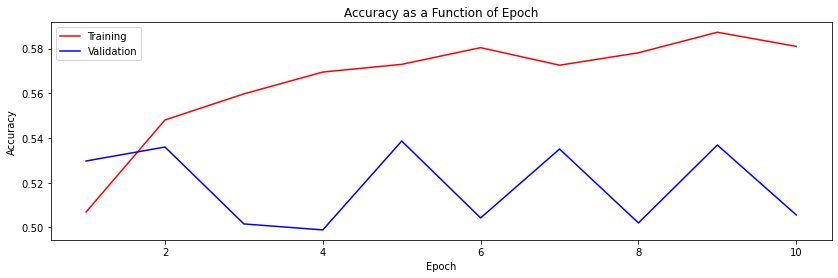

In [27]:
#View the training and validation accuracies as functions of epoch
plt.figure(figsize = (14,4))

sns.lineplot(data = hist, x = 'epoch', y = 'accuracy', color = 'red', label = 'Training')
sns.lineplot(data = hist, x = 'epoch', y = 'val_accuracy', color = 'blue', label = 'Validation') 
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Epoch');
                      

In [28]:
#Compute the final accuracy of the model on the validation data set using the 'evaluate()' method
performance_test = nn1.evaluate(tv_val_reviews_nn, val_sentiments_nn)

print ('The loss value of the model on the validation set is {}'.format(performance_test[0]))
print('The accuracy of the model on the validation set is{}'.format(performance_test[1]))


70/70 [==============================] - 1s 8ms/step - loss: 0.7590 - accuracy: 0.5056
The loss value of the model on the validation set is 0.7589964270591736
The accuracy of the model on the validation set is0.505582869052887


In [29]:
#Declare a range of activation functions and number of neurons in the first hidden layer to tune for
activation_function_list = ['sigmoid','relu']
hidden1_neurons_list = [128, 256]

#Create and train a neural network model for each value of learning rate
performance_df = pd.DataFrame(data = None)
hist = [None] * 4
indexcount = -1

for current_activation_function in activation_function_list:
    for current_hidden1_neurons in hidden1_neurons_list:
        indexcount = indexcount + 1
        
        #Create a neural network model using the 'create_nn' function
        #Note: Set the 'activation_function' parameter to 'current_activation_function'
        #Note: Set the 'activation_function' parameter to 'current_activation_function'
        nn = create_nn(activation_function = current_activation_function,
                      hidden1_neurons = current_hidden1_neurons)
        
        nn.compile(loss = 'binary_crossentropy',
                  metrics = ['accuracy'],
                  optimizer = RMSprop(learning_rate = 0.01))
        
        #Capture the training history of the model using the 'fit()' method
        #Note: Set the 'epochs' parameter to 200
        #Note: Set the 'batch_size' to 'x_train.shape[0]'
        print('\n activation_function = {}'.format(current_activation_function) + 'hidden_neurons = {} - START\n'.format(current_hidden1_neurons))
        nn.summary()
        print('\n')
        nn_history = nn.fit(tv_train_reviews_nn, train_sentiments_nn, validation_data = (tv_val_reviews_nn, val_sentiments_nn), epochs = 10)
        print('\n activation_function = {},'.format(current_activation_function) + 'hidden1_neurons = {} - END\n'.format(current_hidden1_neurons))
        
        hist[indexcount] = pd.DataFrame(nn_history.history)
        hist[indexcount]['epoch'] = nn_history.epoch
        
        tempdf = pd.DataFrame(index = [indexcount],
                                       data = {'Activation Function': current_activation_function,
                                              'First hidden layer neurons': current_hidden1_neurons,
                                              'Train Accuracy': hist[indexcount]['accuracy'][9],
                                              'Validation Accuracy': hist[indexcount]['val_accuracy'][9]})
        performance_df = pd.concat([performance_df, tempdf])
        


 activation_function = sigmoidhidden_neurons = 128 - START

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tfidf_maxfeatures (InputLay  [(None, 500)]            0         
 er)                                                             
                                                                 
 dense_3 (Dense)             (None, 128)               64128     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 72,449
Trainable params: 72,449
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
164/164 [==============================] - 23s 

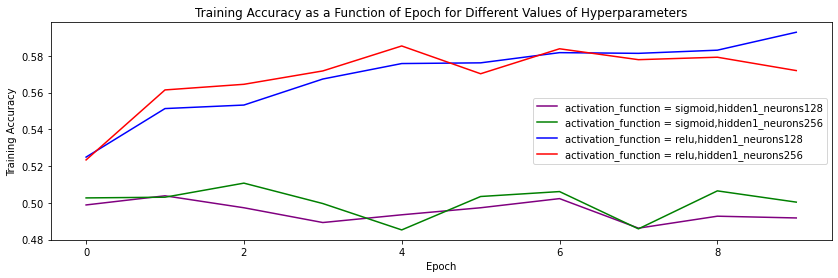

In [30]:
#View the training accuracies as functions of epochs for differenct values of learning rate
plt.figure(figsize = (14,4))
colorlist = ['purple','green', 'blue','red']

indexcount = -1
for current_activation_function in activation_function_list:
    for current_hidden1_neurons in hidden1_neurons_list:
        indexcount = indexcount + 1
        sns.lineplot(data = hist[indexcount],
                    x = 'epoch',
                    y = 'accuracy',
                    color = colorlist[indexcount],
                    label = 'activation_function = '+ str(current_activation_function) + ',hidden1_neurons'+str(current_hidden1_neurons))

plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy as a Function of Epoch for Different Values of Hyperparameters');                   

In [31]:
#Retrain the model with the optimal combindation of hyperparameters amd save its training history

#use the 'create_nn' function to create a neural network with the optimal values of 'activation_function' and 'hidden_neurons'
#Note: Set the 'activation_function' parameter to 'best_activation_function' - This specifies the otimal value for the 'activation function' parameter
#Note: Set the 'hidden1_neurons' parameter to 'best_hidden1_neurons' - This specifies the optimal value for the 'hidden1_neurons' parameters

nn2 = create_nn(activation_function = 'relu', hidden1_neurons = 256)

nn2.compile(loss = 'binary_crossentropy',
           metrics = ['accuracy'],
           optimizer = RMSprop(learning_rate  = 0.01))

#Capture the training history of the model using the 'fit()' method
#Note: Set the 'validation_split' parameter to 0.3
#Note: Set the 'epochs' parameter to 10
#Note: Set the 'batch_size' to 'best_batch_size' - This specifies the optimal value for the 'batch_size' parameter

nn2.summary()
print('\n')
nn2_history = nn2.fit(tv_train_reviews_nn, train_sentiments_nn, validation_data = (tv_val_reviews_nn, val_sentiments_nn), epochs = 10)
hist = pd.DataFrame(nn2_history.history)
hist['epoch'] = nn2_history.epoch

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tfidf_maxfeatures (InputLay  [(None, 500)]            0         
 er)                                                             
                                                                 
 dense_15 (Dense)            (None, 256)               128256    
                                                                 
 dense_16 (Dense)            (None, 64)                16448     
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 144,769
Trainable params: 144,769
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
164/164 [==============================] - 20s 74ms/step - loss: 0.6932 - accuracy: 0.5065 - val_loss: 0.6

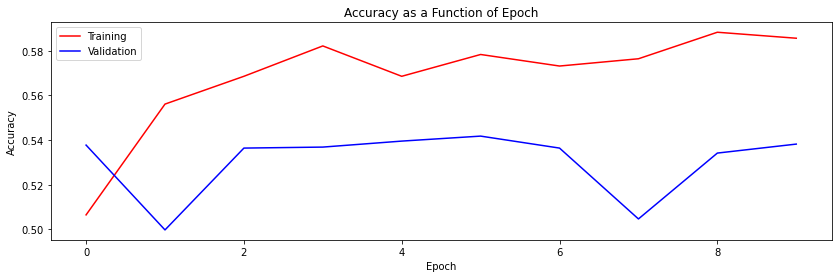

In [32]:
#View the training and validation accuracies as function of epoch
plt.figure(figsize = (14,4))

sns.lineplot(data = hist, x = 'epoch', y = 'accuracy', color = 'red', label = 'Training')
sns.lineplot(data = hist, x = 'epoch', y = 'val_accuracy', color = 'blue', label = 'Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy as a Function of Epoch');

In [33]:
#Compute the final accuracy of the model on the validation data set using the 'evaluate()' method
performance_test = nn2.evaluate(tv_val_reviews_nn)

print('The loss value of the model on the validation data is {}'.format(performance_test[0]))
print('The accuracy of the model on the validation set is {}'.format(performance_test[1]))

70/70 [==============================] - 5s 6ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
The loss value of the model on the validation data is 0.0
The accuracy of the model on the validation set is 0.0


In [34]:
#Readning the test data set
test = pd.read_csv(r'D:\Data Analyst Boot Camp\Assignment Data\Assignment 7\test_file_kaggle.csv')
print(test.shape)
test.head(10)

(3199, 1)


,Reviews
0,the inhospitability of the land emphasizes the...
1,"see it now , before the inevitable hollywood r..."
2,"the weight of the piece , the unerring profess..."
3,the large-frame imax camera lends itself beaut...
4,"what makes how i killed my father compelling ,..."
5,"jason x has cheesy effects and a hoary plot , ..."
6,what eric schaeffer has accomplished with neve...
7,birot creates a drama with such a well-defined...
8,rubbo runs through a remarkable amount of mate...
9,i like my christmas movies with more elves and...


In [35]:
#Apply NLP techniques to pre-process the data set
#Remove stopwords and tokenization
test['Reviews'] = test['Reviews'].apply(remove_stopwords)
#stemming
test['Reviews'] = test['Reviews'].apply(simple_stemmer)
#Lemmatization
test['Reviews'] = test['Reviews'].apply(simple_lemmatize)

In [36]:
#Tfidf vectorizer
test_reviews= list(test['Reviews'])

#transformed text reviews from the Tfdif vectorizer used on the training data set in task 1
tv_test_reviews = tv.transform(test_reviews)

print('Tfdif_val:', tv_test_reviews.shape)

Tfdif_val: (3199, 500)


In [37]:
#Note: Use this cell to convert your testing dataset tdift vectorization into appropriate format
#if you are using the neural network as the final model.
#if you are using a machine learning model, you don't need to use this cell

#For the testing dataset
tv_test_reviews_nn = tf.sparse.reorder(convert_sparse_matrix_to_sparse_tensor(tv_test_reviews))

In [38]:
#Use your trained optimized learning model to make predictions on the prepared test data set
#Note: Edit the name of your trained model
y_pred_test = nn1.predict(tv_test_reviews_nn)
print("prediction shape:", y_pred_test.shape)
y_pred_test

100/100 [==============================] - 7s 6ms/step
prediction shape: (3199, 1)


array([[0.48455742],
       [0.9961429 ],
       [0.48455742],
       ...,
       [0.48455742],
       [0.48455742],
       [0.7208634 ]], dtype=float32)

In [39]:
y_pred_test = nn1.predict(tv_test_reviews_nn)
y_classes = (y_pred_test >0.7).astype(int)
y_classes

100/100 [==============================] - 4s 5ms/step


array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [41]:
submit = pd.DataFrame(y_classes)
submit.to_csv("test_submission_starter.csv", header = None, index = False)